In [1]:
suppressMessages(library(ArchR))
library(parallel)
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = round(parallel::detectCores()*1/4))

# ##################################
# ### load rheMac10 ArchR genome ###
# GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
# load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

addArchRGenome("mm10")

Setting default number of Parallel threads to 8.

Setting default genome to Mm10.



In [3]:
PROJDIR='../../../data/tidy_data/ArchRProjects'
ARCHDIR=file.path(PROJDIR,'Mouse_DorsalHorn_scATAC')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
head(getCellColData(proj))

DataFrame with 6 rows and 24 columns
                                                  Sample TSSEnrichment
                                             <character>     <numeric>
Mouse_DH_SEA2253A58#CGACAAAAAAAAAAAG Mouse_DH_SEA2253A58        14.994
Mouse_DH_SEA2253A58#CAGTAAAAAAAAAAAT Mouse_DH_SEA2253A58        22.800
Mouse_DH_SEA2253A58#CTGCAAAAAAAAAAAA Mouse_DH_SEA2253A58        21.583
Mouse_DH_SEA2253A58#GTGTAAAAAAAAAAAA Mouse_DH_SEA2253A58        22.169
Mouse_DH_SEA2253A58#GGGTAAAAAAAAAAAC Mouse_DH_SEA2253A58        19.802
Mouse_DH_SEA2253A58#TTGGAAAAAAAAAAAC Mouse_DH_SEA2253A58        20.646
                                     ReadsInTSS ReadsInPromoter
                                      <numeric>       <numeric>
Mouse_DH_SEA2253A58#CGACAAAAAAAAAAAG       9268           32448
Mouse_DH_SEA2253A58#CAGTAAAAAAAAAAAT      14496           48252
Mouse_DH_SEA2253A58#CTGCAAAAAAAAAAAA      14442           47003
Mouse_DH_SEA2253A58#GTGTAAAAAAAAAAAA      14095           47225
Mouse_DH_SE

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1980049e08497-Date-2022-08-16_Time-12-03-18.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1980049e08497-Date-2022-08-16_Time-12-03-18.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-198005396bdee-Date-2022-08-16_Time-12-03-33.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-198005396bdee-Date-2022-08-16_Time-12-03-33.log



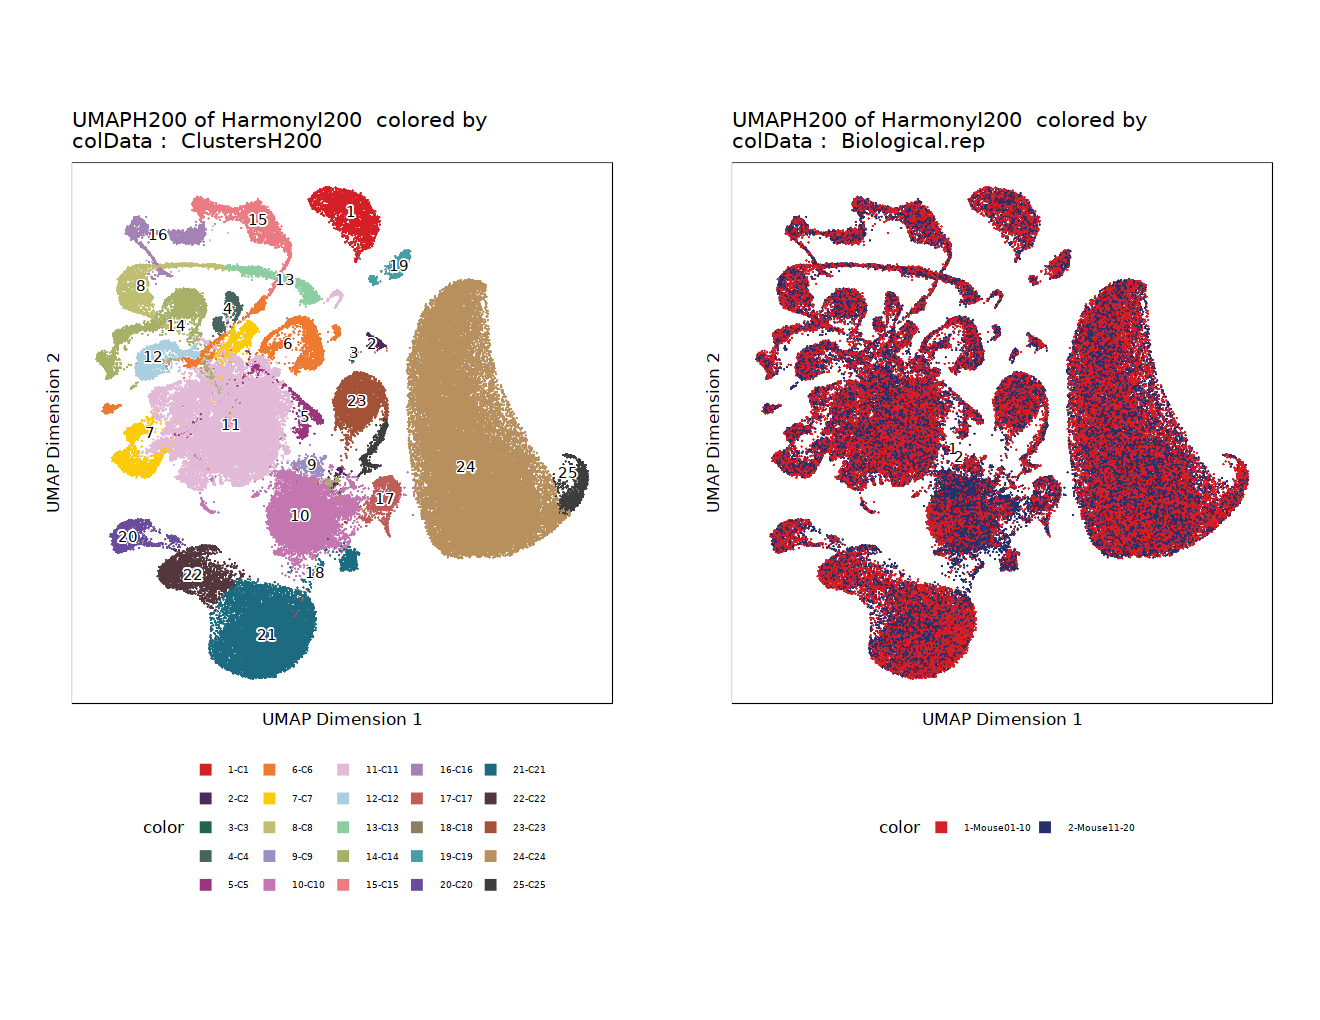

In [5]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersH200", embedding = "UMAPH200")

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Biological.rep", embedding = "UMAPH200")
                    
ggAlignPlots(p1, p3, type = "h")

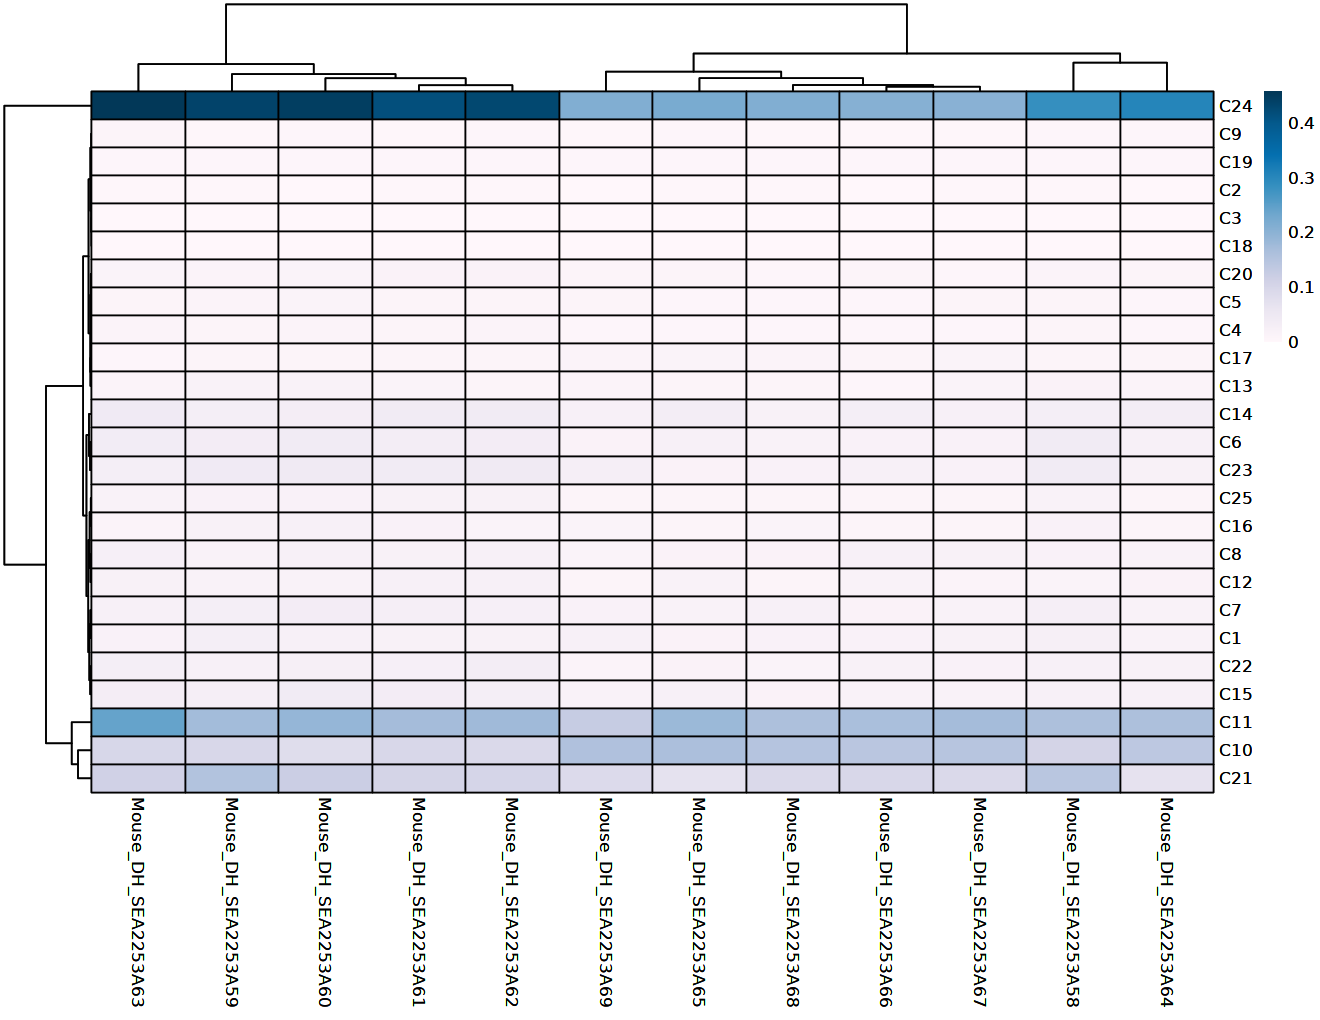

In [6]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(paste0(proj$ClustersH200), paste0(proj$Sample))
cM <- cM / Matrix::colSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

In [8]:
proj <- addImputeWeights(proj,
                        reducedDims = "HarmonyI200")


ArchR logging to : ArchRLogs/ArchR-addImputeWeights-198002fc4451d-Date-2022-08-16_Time-12-05-32.log
If there is an issue, please report to github with logFile!

2022-08-16 12:05:34 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1980044774358-Date-2022-08-16_Time-12-10-46.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-08-16 12:10:47 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1980044774358-Date-2022-08-16_Time-12-10-46.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


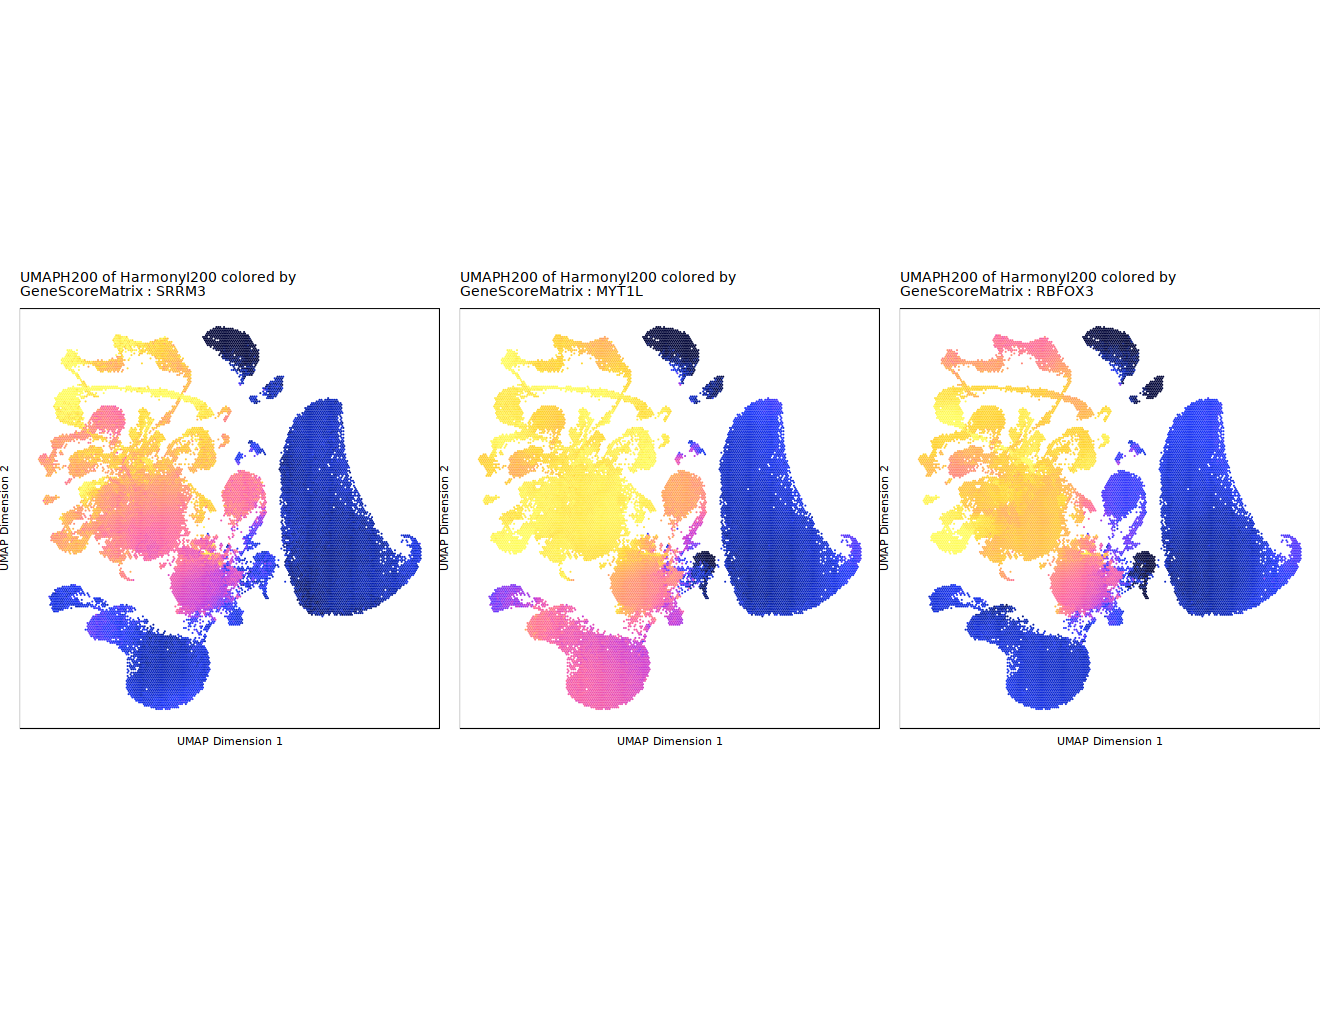

In [9]:
## Neuron vs. Glia markers
markerGenes1  <- c('SRRM3',#Neurons
                   'MYT1L',#Neurons
                   'RBFOX3'#Neurons
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1980063f21b71-Date-2022-08-16_Time-12-19-01.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-08-16 12:19:02 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1980063f21b71-Date-2022-08-16_Time-12-19-01.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


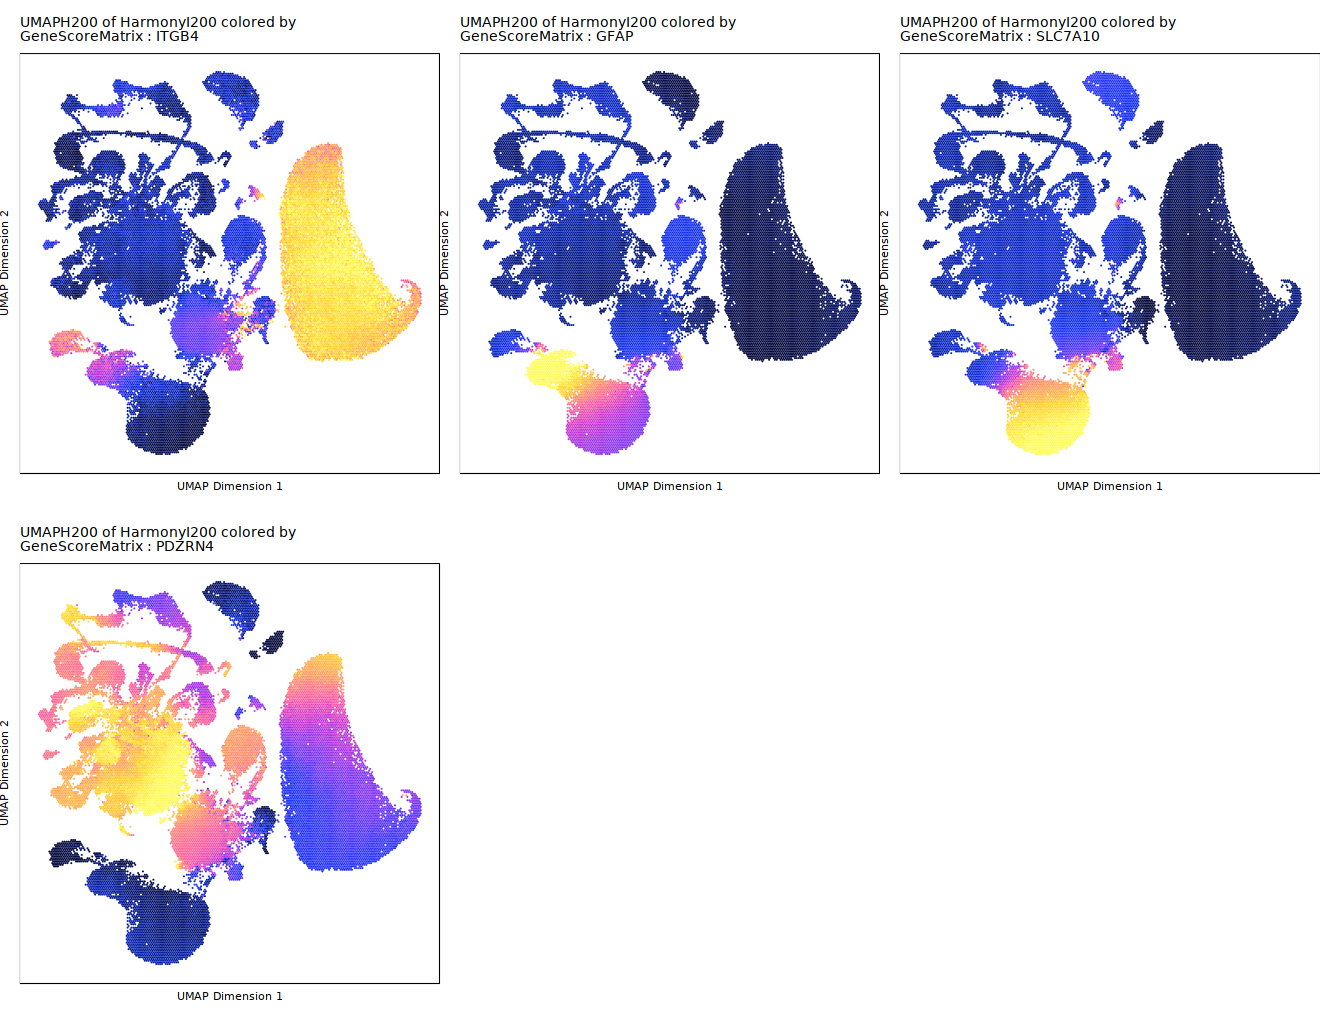

In [11]:
## Neuron vs. Glia markers
markerGenes1  <- c('ITGB4',#Astrocyte1
                   'GFAP',#Astrocyte1
                   'SLC7A10',#Astrocyte2
                   'PDZRN4'#Astrocyte2
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

In [29]:
## Neuron vs. Glia markers
markerGenes1  <- c('RFX2'#Ependymal 
#                    'DNAH12'#Ependymal 
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1980013fe27a8-Date-2022-08-17_Time-13-55-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-08-17 13:55:54 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1980013fe27a8-Date-2022-08-17_Time-13-55-42.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


ERROR: Error in x + guides(color = FALSE, fill = FALSE): non-numeric argument to binary operator


Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-198006ea1881c-Date-2022-08-16_Time-12-24-31.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-08-16 12:24:31 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-198006ea1881c-Date-2022-08-16_Time-12-24-31.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


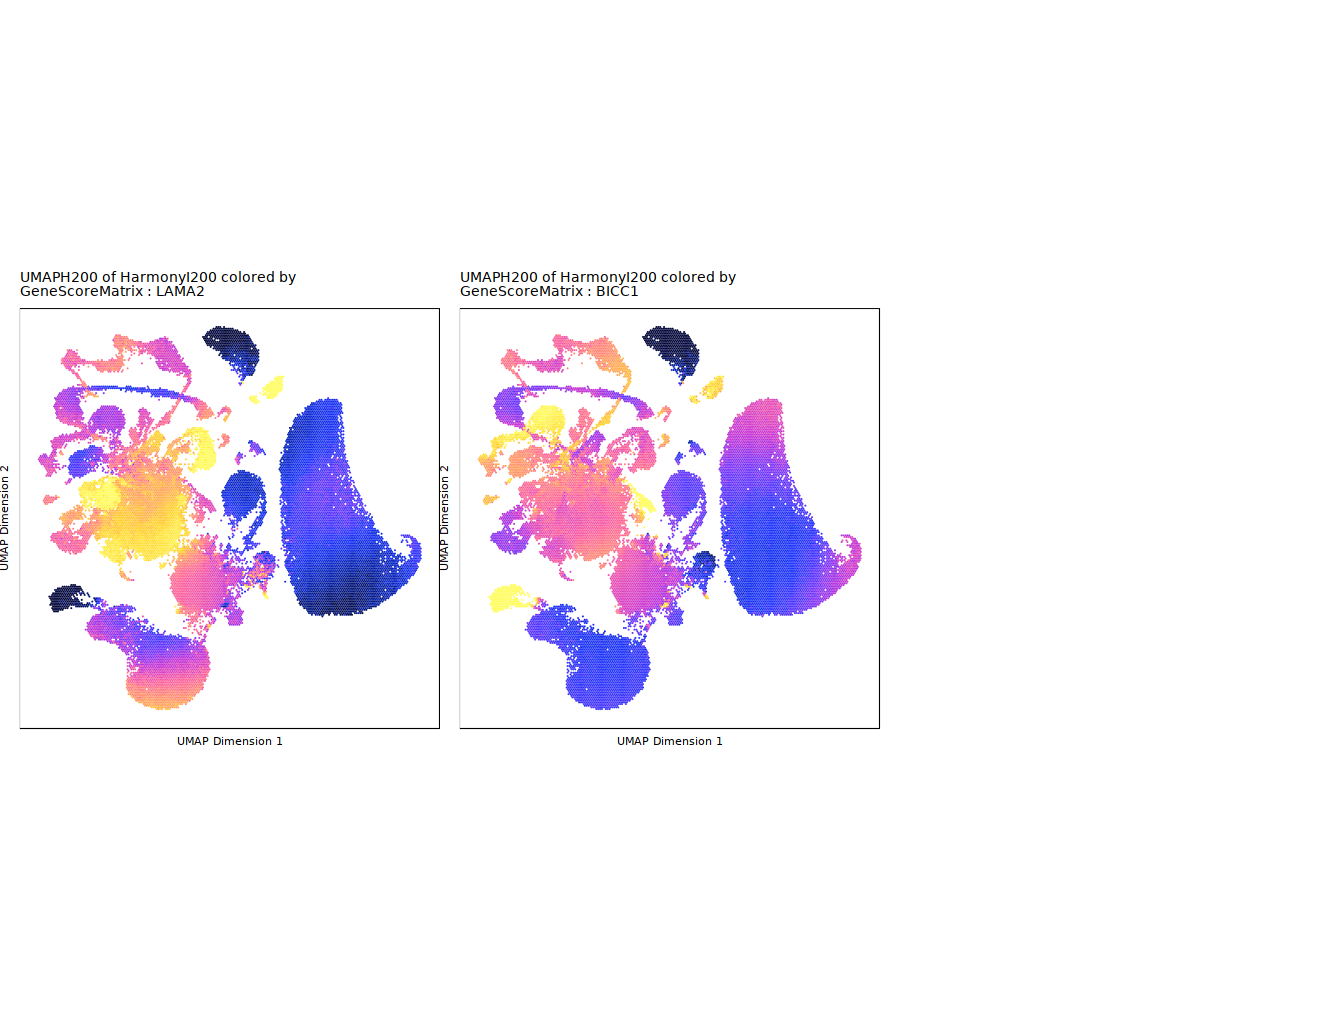

In [14]:
## Neuron vs. Glia markers
markerGenes1  <- c('LAMA2',#Meninges
                   'BICC1'#Meninges
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1980033d588ae-Date-2022-08-16_Time-12-27-50.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-08-16 12:27:57 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1980033d588ae-Date-2022-08-16_Time-12-27-50.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


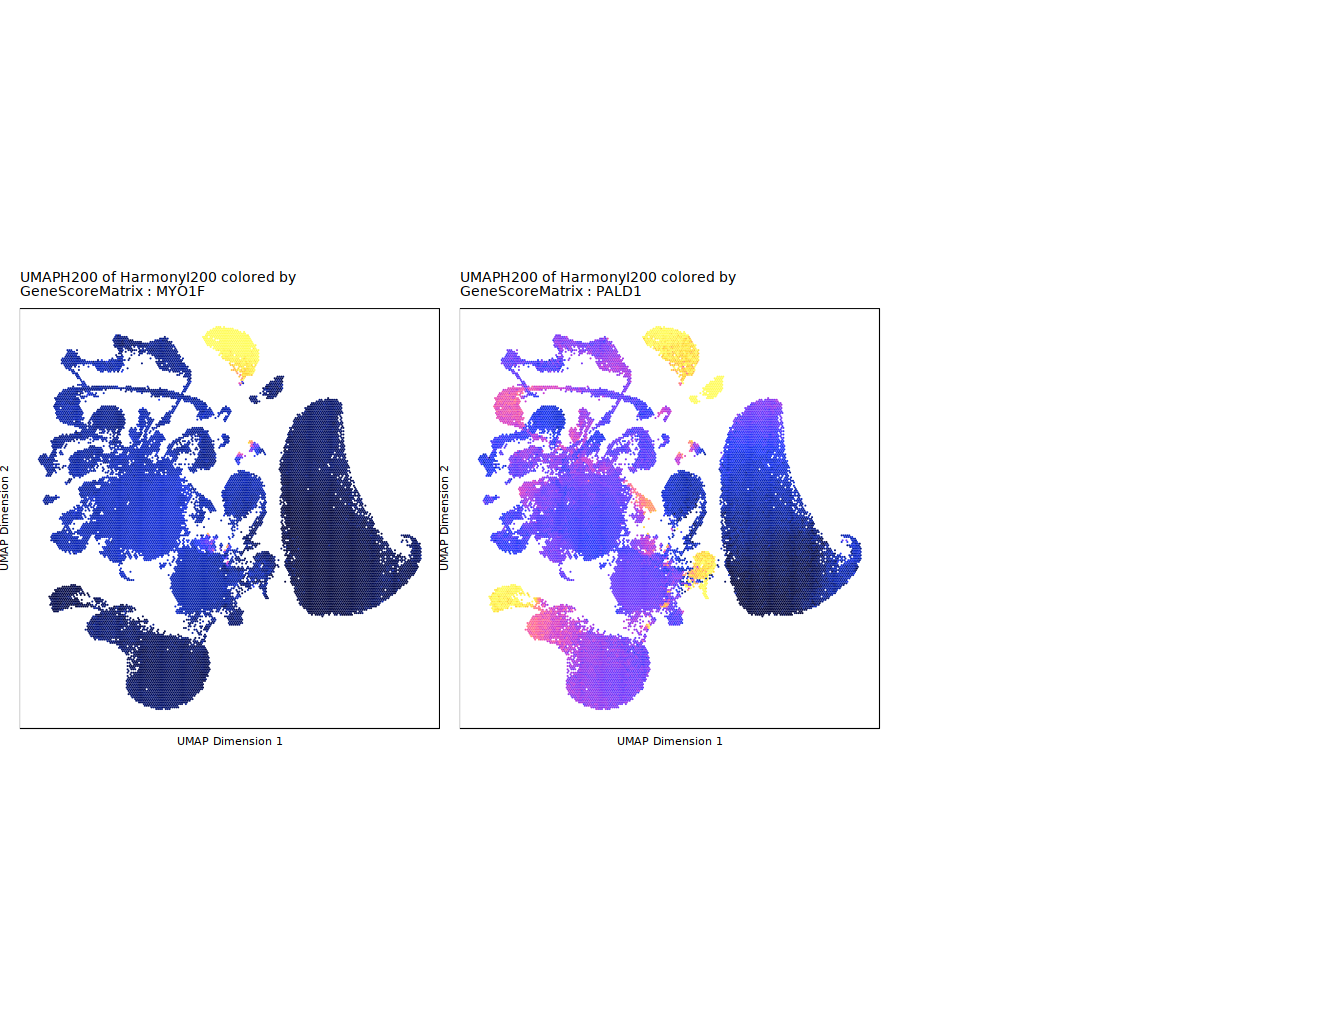

In [15]:
## Neuron vs. Glia markers
markerGenes1  <- c('MYO1F',#Microglia
                   'PALD1' #Microglia
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))


Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-198001ef8d2e0-Date-2022-08-16_Time-12-31-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-08-16 12:31:21 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-198001ef8d2e0-Date-2022-08-16_Time-12-31-19.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


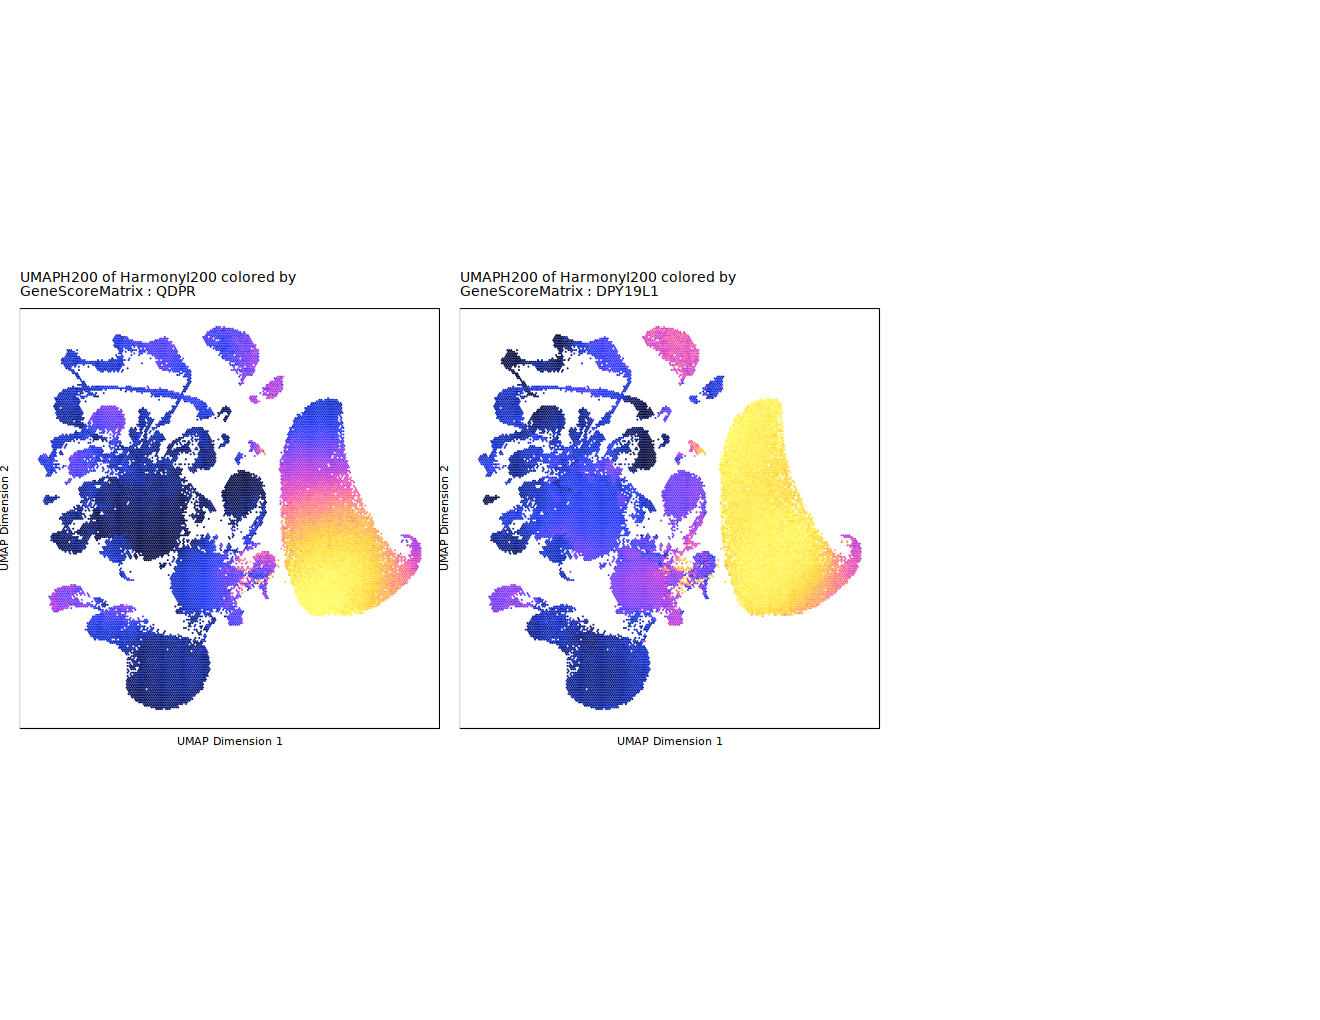

In [16]:
## Neuron vs. Glia markers
markerGenes1  <- c('QDPR',#Oligo1
                   'DPY19L1'#Oligo2
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-198005ca021df-Date-2022-08-16_Time-12-34-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-08-16 12:34:49 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-198005ca021df-Date-2022-08-16_Time-12-34-45.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


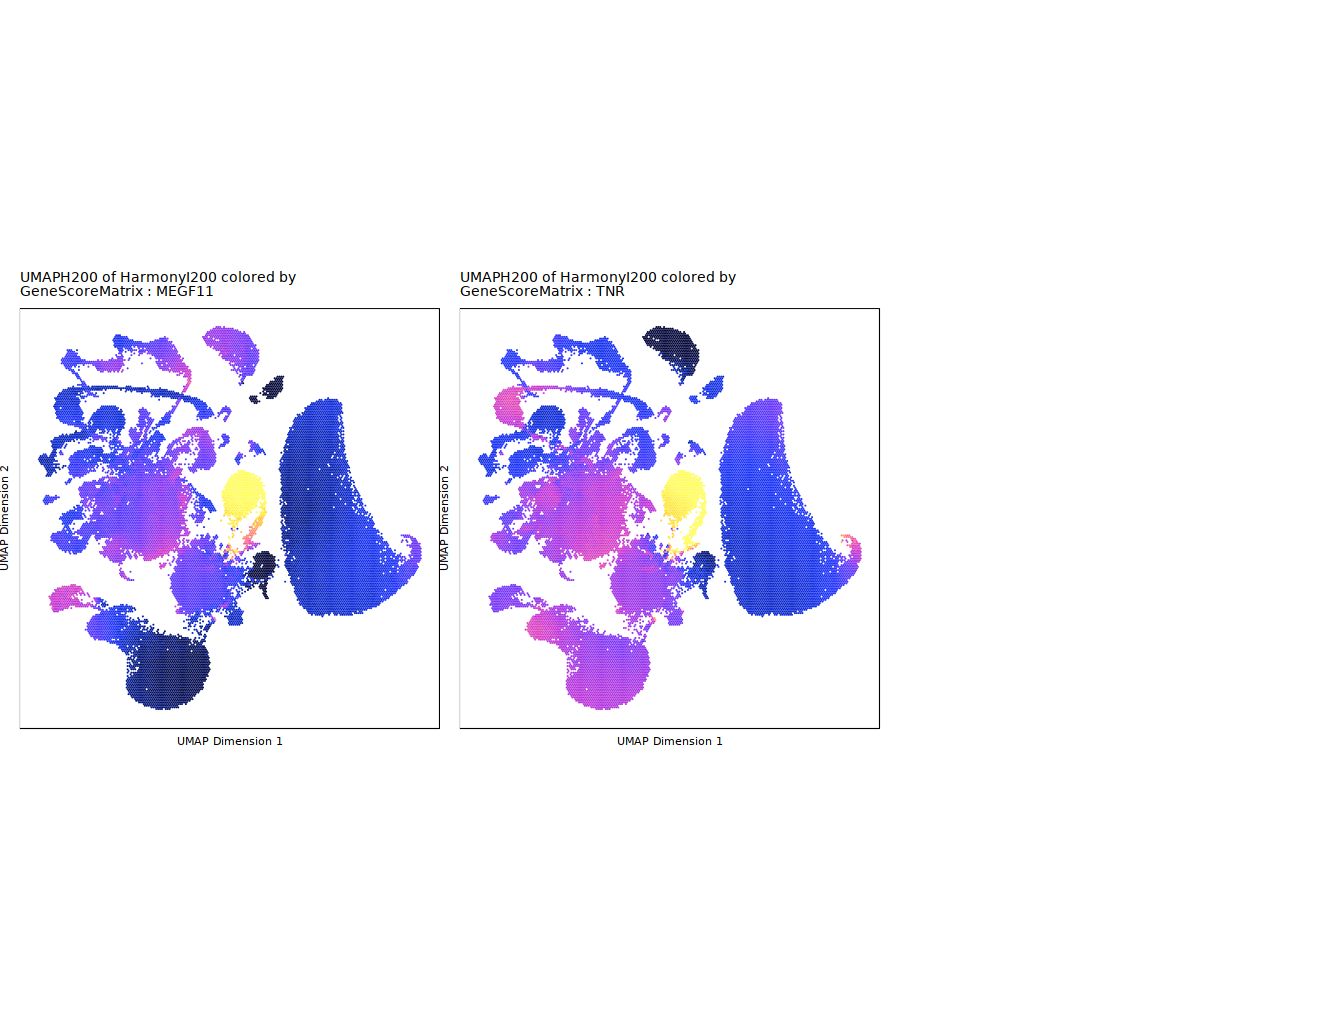

In [17]:
## Neuron vs. Glia markers
markerGenes1  <- c('MEGF11',#OPC
                   'TNR'#OPC
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

In [18]:
## Neuron vs. Glia markers
markerGenes1  <- c('MPZ',#Schwann
                   'PMP22'#Schwann
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-198006462c53c-Date-2022-08-16_Time-12-38-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-08-16 12:38:22 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-198006462c53c-Date-2022-08-16_Time-12-38-19.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-198004699e154-Date-2022-08-16_Time-12-41-59.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-08-16 12:42:11 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-198004699e154-Date-2022-08-16_Time-12-41-59.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


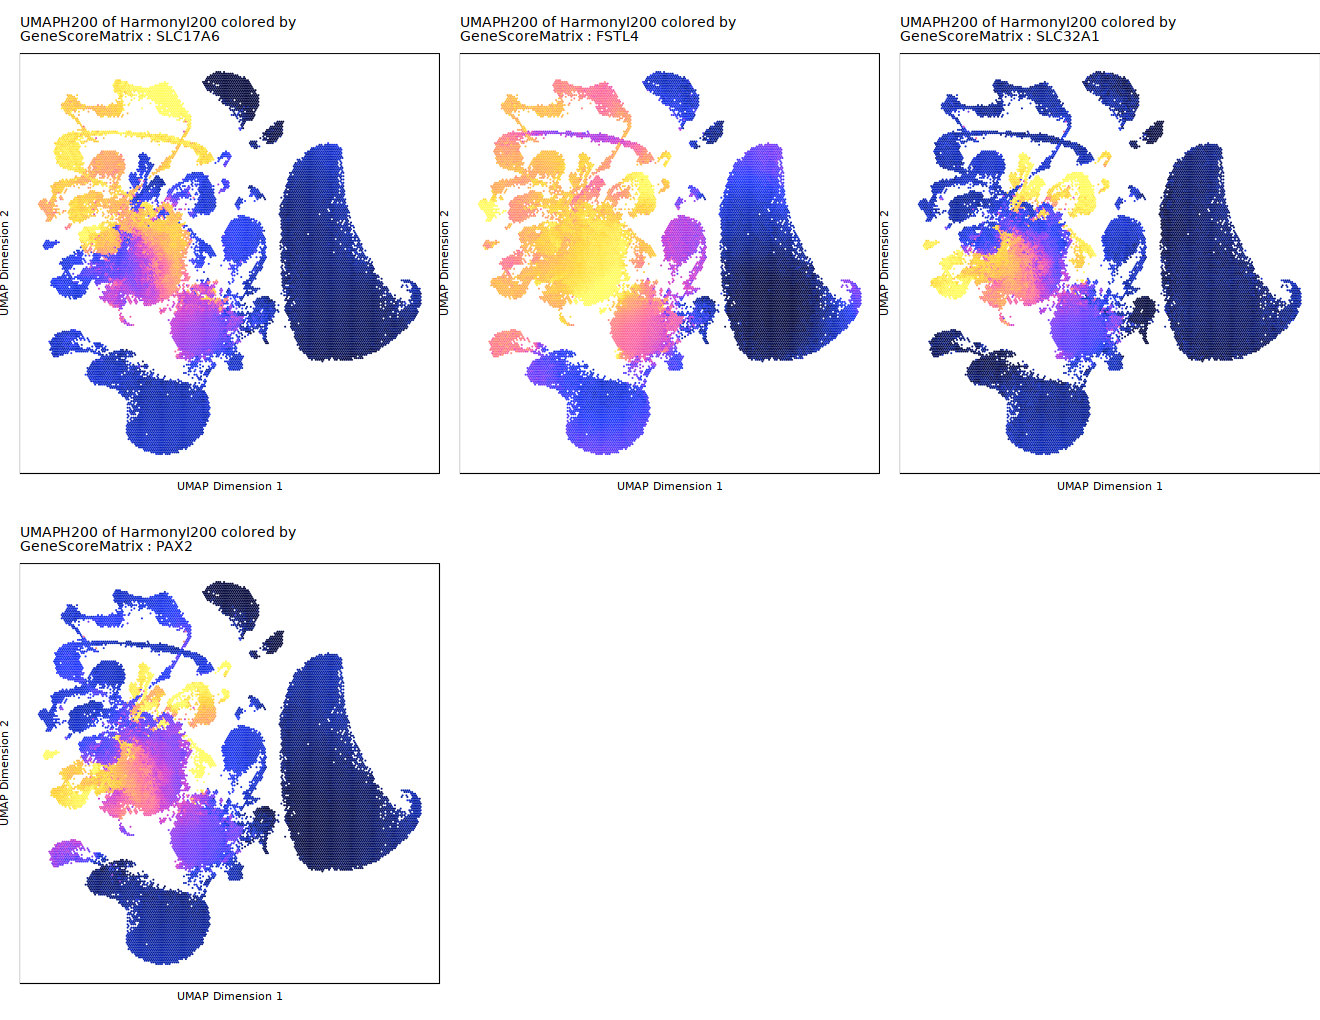

In [19]:
## Excitatory vs. Inhibitory markers
markerGenes1  <- c('SLC17A6','FSTL4', # Excitatory 
                   'SLC32A1','PAX2' # Inhibitory
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

In [22]:
## Marker Genes for differentiation of Excitatory Neurons
markerGenes1  <- c('GFRA1',
                   'CRHR2',
                   'COL13A1',
                   'NMUR2',
#                    'TAC3',
                   'NMU',
                   'COL5A2',
                   'GHR',
                   'COL24A1',
                   'NMBR',
                   'TAC1',
#                    'ANOS1',
                   'FSTL4',
                   'ADARB2',
                   'MAF',
                   'ST8SIA6',
                   'MAFA',
                   'NTNG1',
                   'ADAMTS16',
                   'TLL2',
                   'OTOGL'
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1980050588545-Date-2022-08-16_Time-13-31-16.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-08-16 13:31:16 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1980050588545-Date-2022-08-16_Time-13-31-16.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-19800358307fa-Date-2022-08-16_Time-13-40-20.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-08-16 13:40:39 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-19800358307fa-Date-2022-08-16_Time-13-40-20.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guide

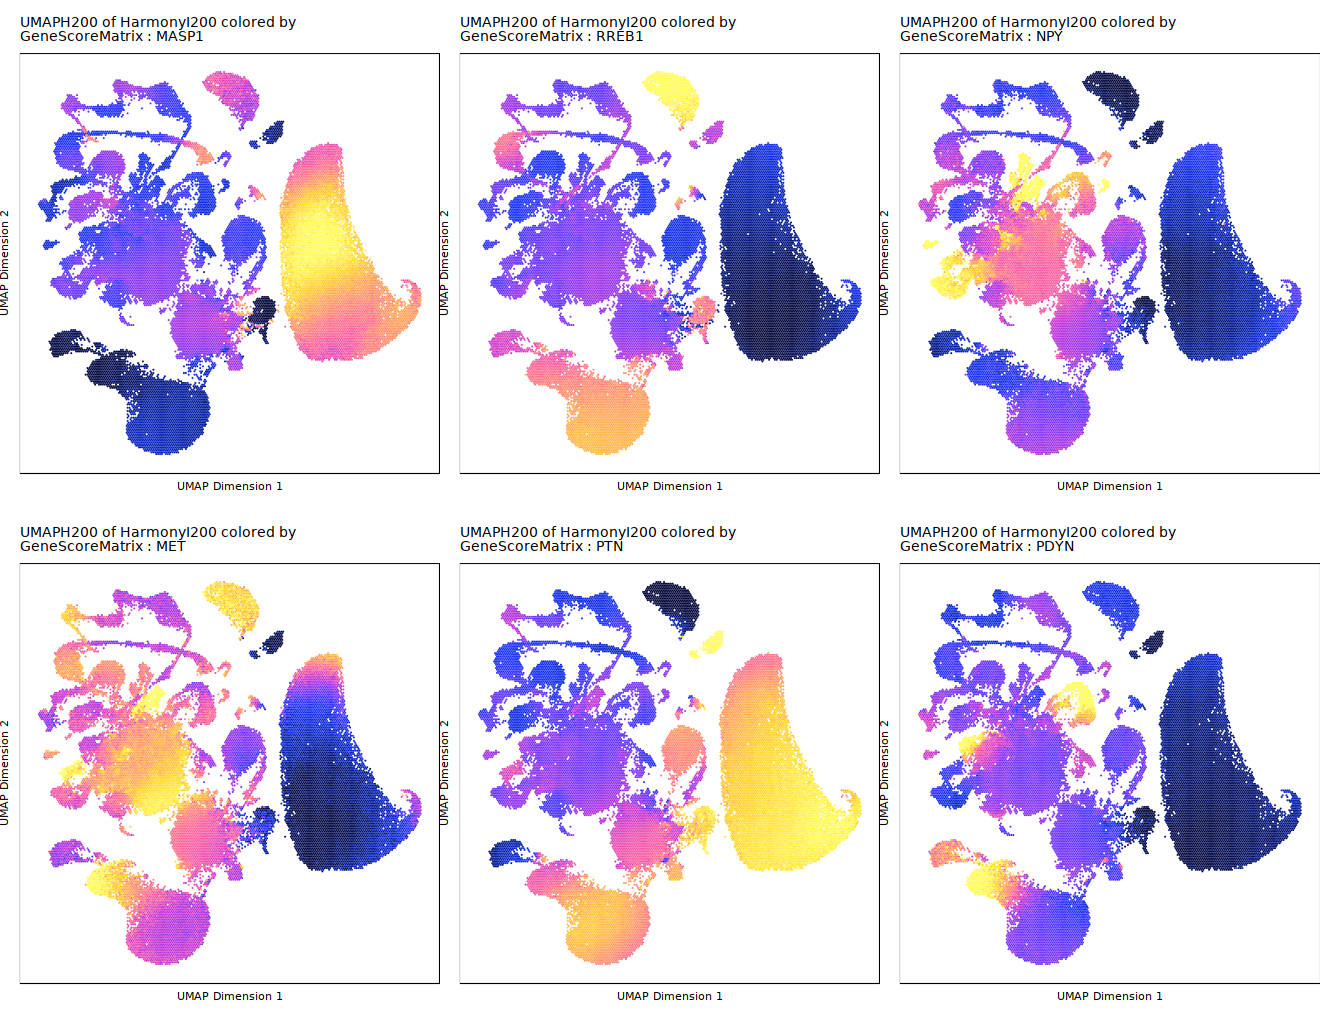

In [24]:
## Marker Genes for differentiation of Inhibitory Nuerons
markerGenes1  <- c('MASP1',
                   'RREB1',
                   'NPY',
                   'MET',
                   'PTN',
                   'PDYN'
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-198006e9f69b0-Date-2022-08-17_Time-11-22-16.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-198006e9f69b0-Date-2022-08-17_Time-11-22-16.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-19800793a7879-Date-2022-08-17_Time-11-22-26.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-19800793a7879-Date-2022-08-17_Time-11-22-26.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1980075df092d-Date-2022-08-17_Time-11-22-34.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to :

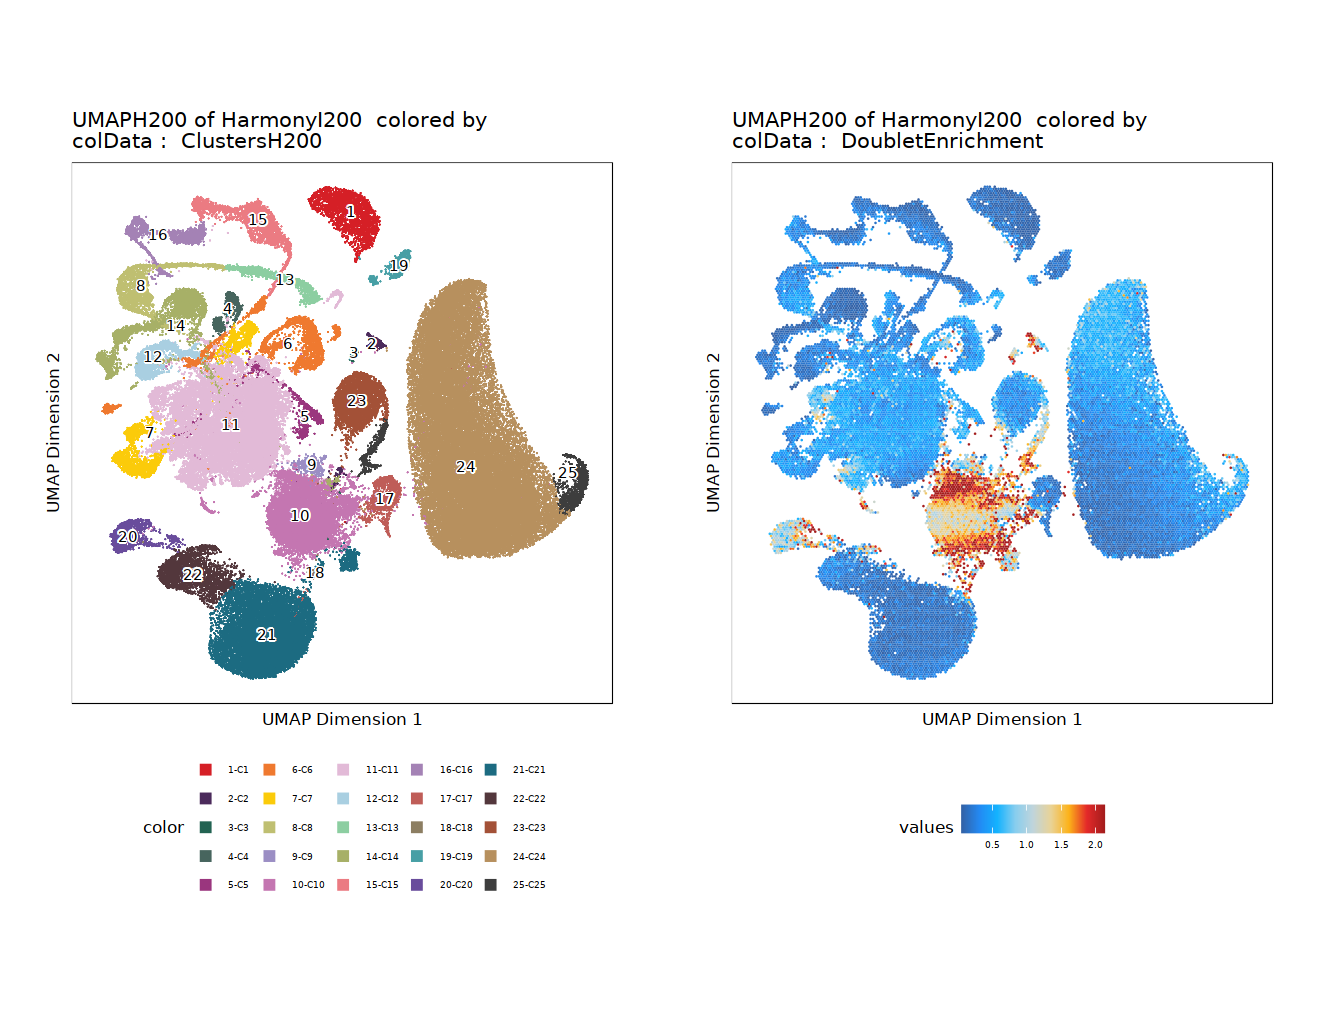

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1980029908a7f-Date-2022-08-17_Time-11-22-48.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1980029908a7f-Date-2022-08-17_Time-11-22-48.log



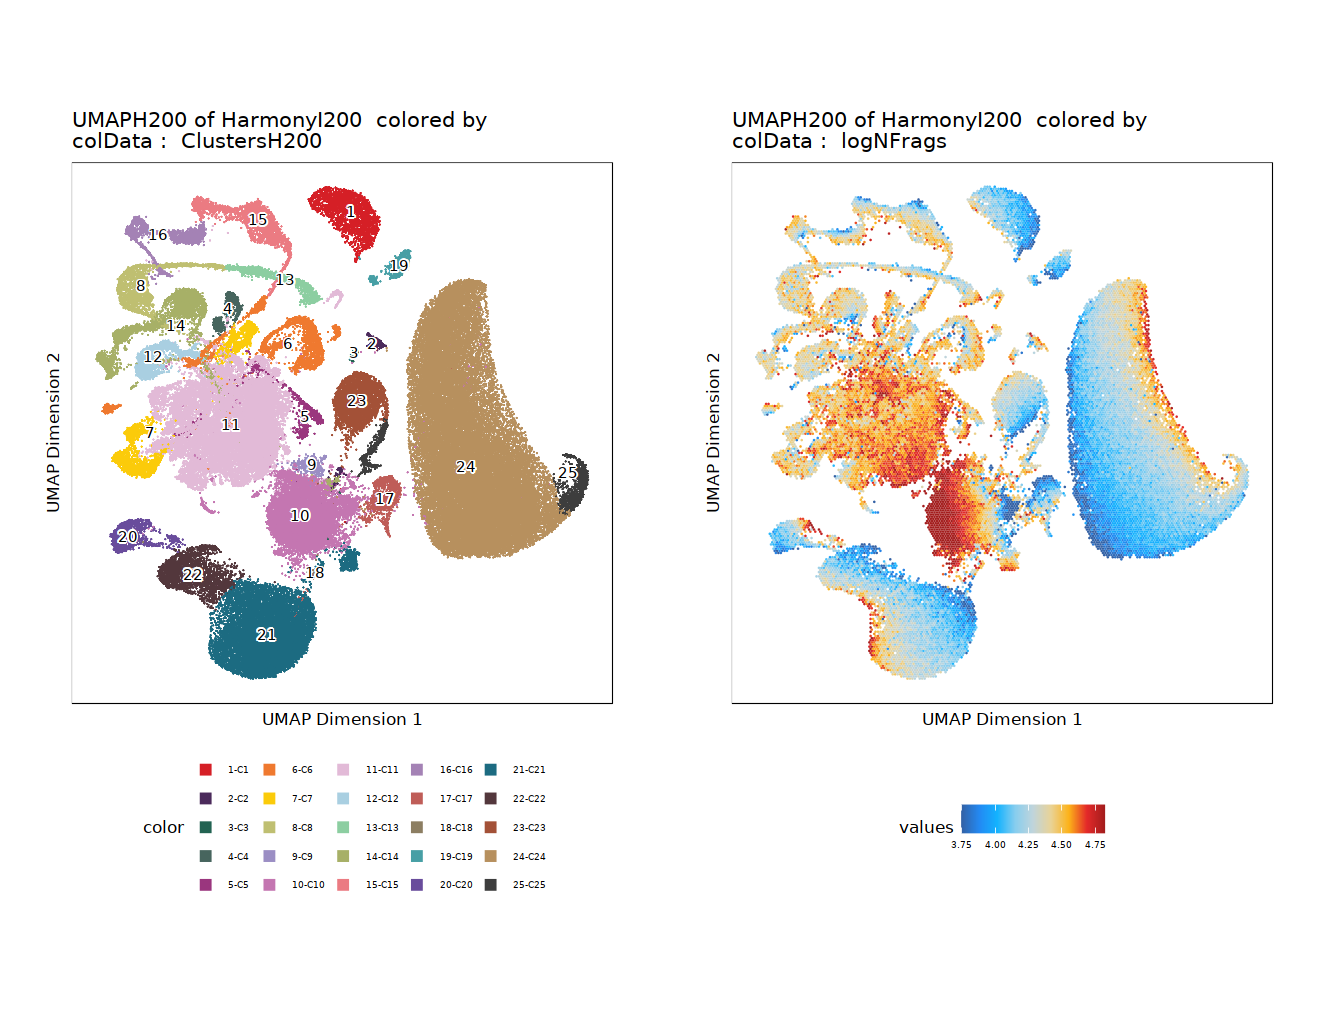

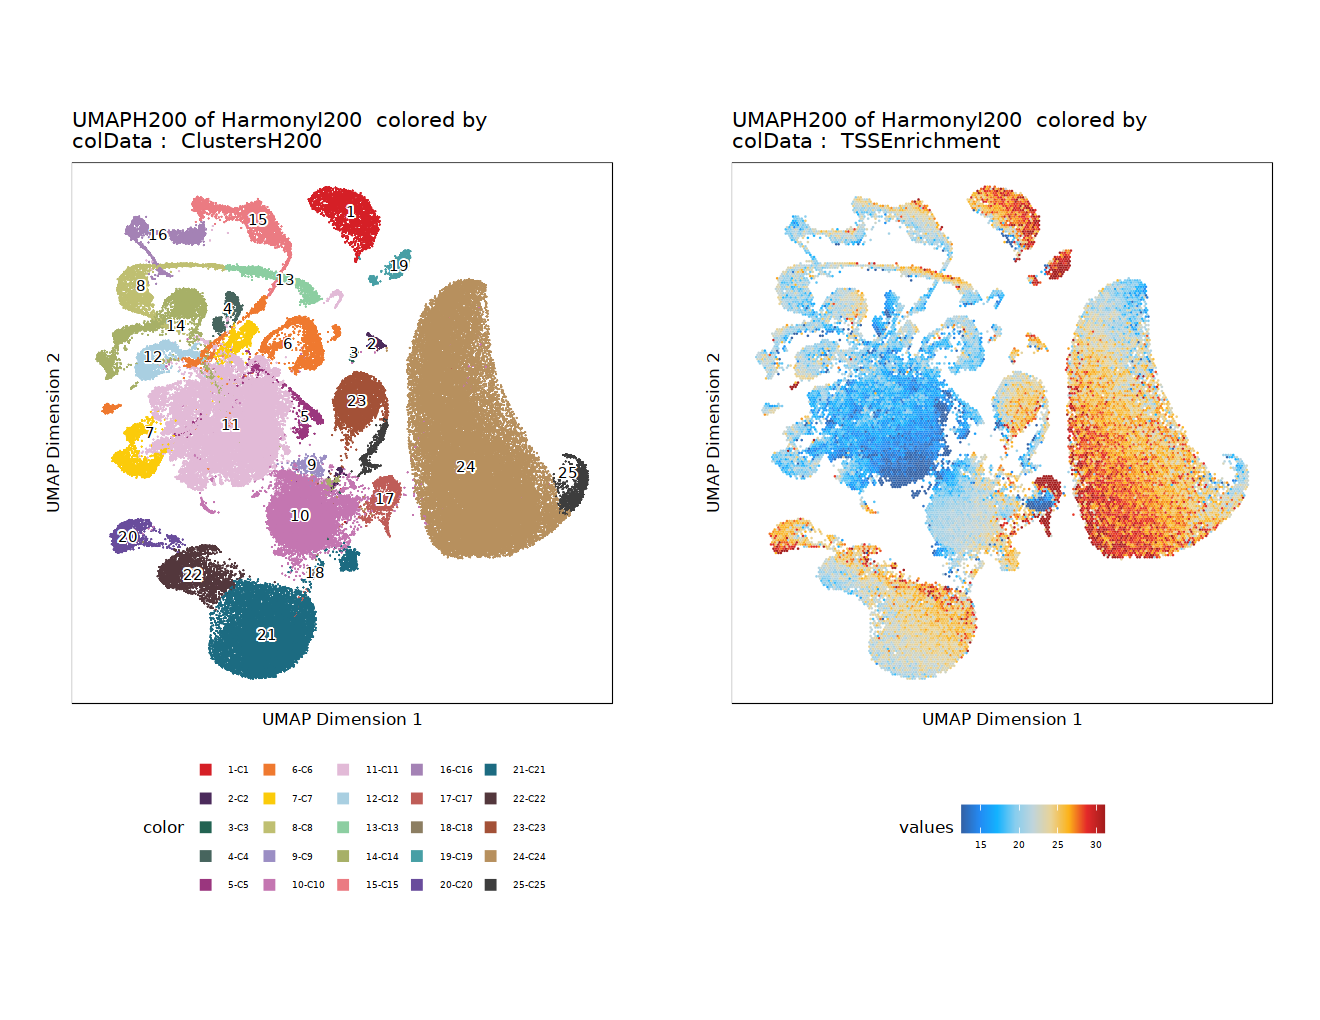

In [27]:
## make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersH200", embedding = "UMAPH200")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAPH200")

ggAlignPlots(p1, p2, type = "h")

proj$logNFrags = log10(proj$nFrags)

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "logNFrags", embedding = "UMAPH200")

ggAlignPlots(p1, p3, type = "h")

p4 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "TSSEnrichment", embedding = "UMAPH200")

ggAlignPlots(p1, p4, type = "h")

In [30]:
############################################
# using marker gene scores, give cluster names
remapClust <- c(
  'C1'='Micro',
  'C2'='Drop',
  'C3'='Drop',
  'C4'='INH',
  'C5'='INH',
  'C6'='INH',
  'C7'='INH', 
  'C8'='EXC',
  'C9'='Drop',
  'C10'='Drop',
  'C11'='EXC',
  'C12'='EXC',
  'C13'='EXC',
  'C14'='EXC',
  'C15'='EXC',
  'C16'='EXC',
  'C17'='Schwann',
  'C18'='Drop',
  'C19'='Meninges',
  'C20'='Micro',
  'C21'='Astrocyte',
  'C22'='Astrocyte',
  'C23'='Schwann',
  'C24'='Oligo',
  'C25'='OPC'
)

proj$Celltype1 <- mapLabels(proj$ClustersH200, newLabels = remapClust, 
                            oldLabels = names(remapClust))
table(proj$Celltype1)


Astrocyte      Drop       EXC       INH  Meninges     Micro     Oligo       OPC 
    13816     13947     31882      7177       603      3472     33537      1408 
  Schwann 
     4263 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1980037ddd101-Date-2022-08-17_Time-14-36-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1980037ddd101-Date-2022-08-17_Time-14-36-36.log



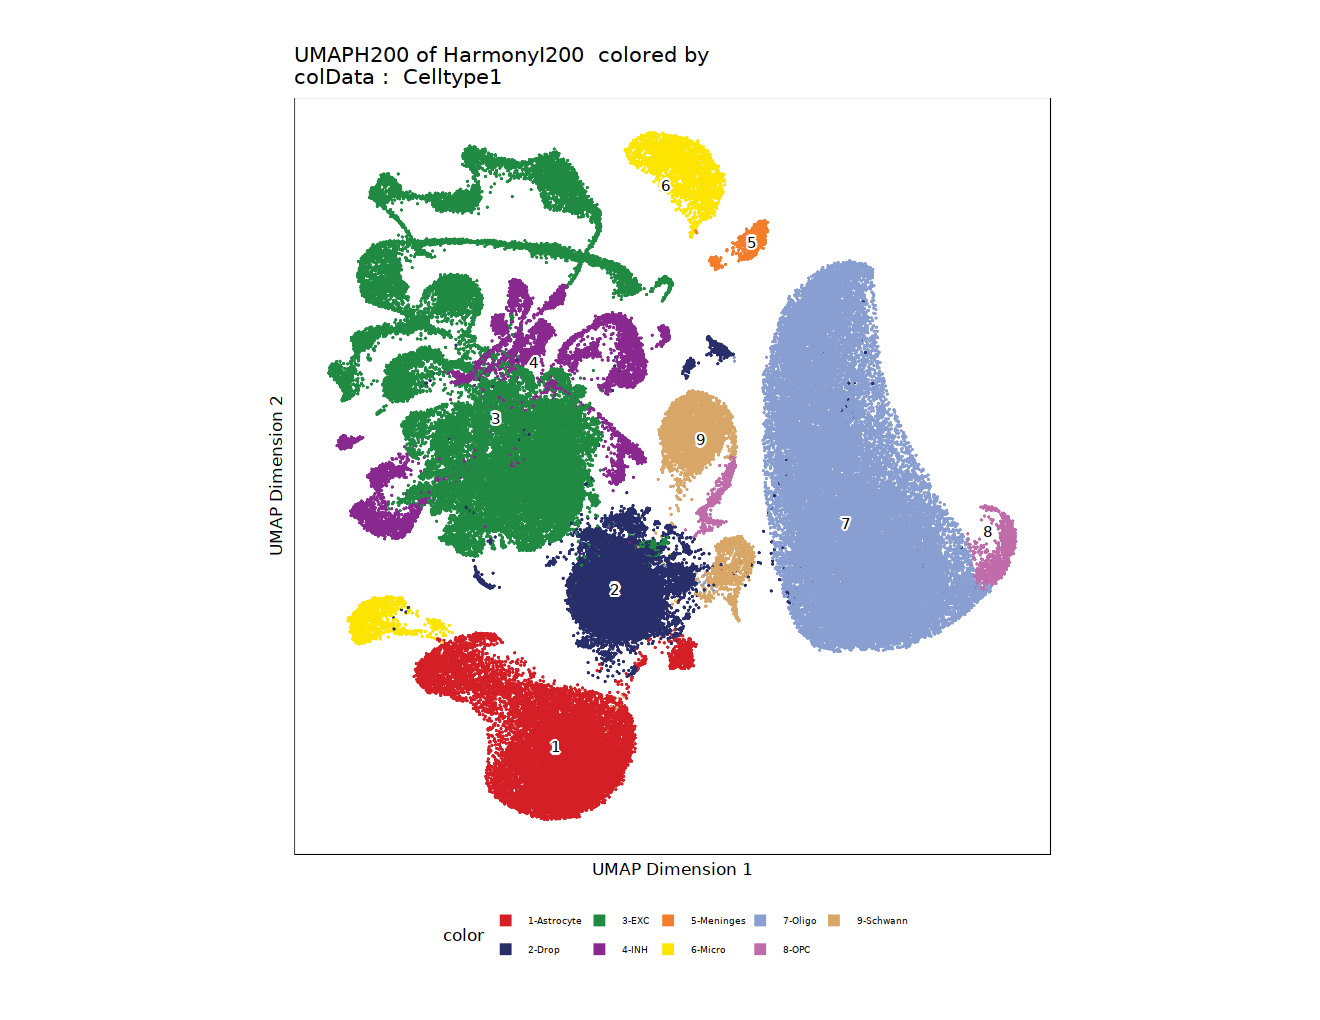

In [32]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Celltype1", embedding = "UMAPH200")

p1

In [33]:
# drop the drop clusters, pull out the neuron cell types
ARCHDIR2=file.path(PROJDIR,'Mouse_scATAC_DorsalHorn_neuron')
neuronType = c( 'INH','EXC')
idxSample <- BiocGenerics::which(proj$Celltype1 %in% neuronType )
table(proj$Celltype1[idxSample])
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj, cells = cellsSample,
  outputDirectory = ARCHDIR2, force = TRUE
)


  EXC   INH 
31882  7177 

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq/data/tidy_data/ArchRProjects/Mouse_scATAC_DorsalHorn_neuron

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 3): Embeddings

Copying Other Files (2 of 3): IterativeLSI200

Copying Other Files (3 of 3): IterativeLSI30

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /               

In [35]:
# drop the drop clusters, pull out the glia cell types
ARCHDIR2=file.path(PROJDIR,'Mouse_scATAC_DorsalHorn_glia')
idxSample <- BiocGenerics::which(proj$Celltype1 %ni% c(neuronType, 'Drop'))
table(proj$Celltype1[idxSample])
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj,
  cells = cellsSample,
  outputDirectory = ARCHDIR2, force = TRUE
)


Astrocyte  Meninges     Micro     Oligo       OPC   Schwann 
    13816       603      3472     33537      1408      4263 

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq/data/tidy_data/ArchRProjects/Mouse_scATAC_DorsalHorn_glia

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 3): Embeddings

Copying Other Files (2 of 3): IterativeLSI200

Copying Other Files (3 of 3): IterativeLSI30

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |

In [36]:
proj = saveArchRProject(ArchRProj = proj)


Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         